About Dataset

- Context

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking the knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

Objectives


- Identify the top-selling products in the superstore dataset.
- Determine the most profitable product categories.
- Analyze sales performance by region and identify the top-performing regions.
- Identify customer segments with the highest sales and profit contributions.
- Identify the top valuable customers
- Identify any seasonal trends or patterns in sales and profits.
- Determine the products or categories with the highest profit margins.
- Provide recommendations on target products, regions, categories, and customer segments for maximizing sales and profit.

Metadata
- Row ID => Unique ID for each row.
- Order ID => Unique Order ID for each Customer.
- Order Date => Order Date of the product.
- Ship Date => Shipping Date of the Product.
- Ship Mode=> Shipping Mode specified by the Customer.
- Customer ID => Unique ID to identify each Customer.
- Customer Name => Name of the Customer.
- Segment => The segment where the Customer belongs.
- Country => Country of residence of the Customer.
- City => City of residence of of the Customer.
- State => State of residence of the Customer.
- Postal Code => Postal Code of every Customer.
- Region => Region where the Customer belong.
- Product ID => Unique ID of the Product.
- Category => Category of the product ordered.
- Sub-Category => Sub-Category of the product ordered.
- Product Name => Name of the Product
- Sales => Sales of the Product.
- Quantity => Quantity of the Product.
- Discount => Discount provided.
- Profit => Profit/Loss incurred.

In [35]:
# Start by importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Load the dataset with 'latin-1' encoding
df = pd.read_csv('Superstore.csv', encoding='latin-1')

# Display the first 5 rows of the DataFrame
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
# Check the dimensions of the dataset
print("Dataset shape:", df.shape)

# Check the column names
print("Column names:", df.columns)

# Get an overview of the data types and missing values
print(df.info())

# Summary statistics of numerical columns
print(df.describe())


Dataset shape: (9994, 21)
Column names: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State     

In [4]:
# Finding the Top-Selling Products in the superstore
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
print("Top Selling Products:")
print(top_products)

Top Selling Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [41]:
# Identifying the most profitable product categories.
profitable_category = df.groupby('Category')['Profit'].sum().nlargest()
print("Profitable Product Category:")
print(profitable_category)


Profitable Product Category:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


In [48]:
# Identifying Sales Performance by Region.
sales_performance_by_region = df.groupby('Region')['Sales'].sum().nlargest()
print("Sales Performance by Region:")
print(sales_performance_by_region)

#Identifying the top selling products in the western region
# Filter the dataset to include only records from the Western region
western_df = df[df['Region'] == 'West']

# Group the data by product name and calculate the sum of sales
product_sales = western_df.groupby('Product Name')['Sales'].sum()

# Sort the products based on their sales in descending order
sorted_products = product_sales.sort_values(ascending=False)

# Retrieve the top-selling products
top_selling_products = sorted_products.head(10)  # Change the number to get more or fewer top-selling products

# Print the top-selling products
print(top_selling_products)

Sales Performance by Region:
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64
Product Name
Canon imageCLASS 2200 Advanced Copier                                          13999.960
High Speed Automatic Electric Letter Opener                                    13100.240
Global Troy Executive Leather Low-Back Tilter                                  10019.600
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     8134.336
GuestStacker Chair with Chrome Finish Legs                                      8030.016
Okidata MB760 Printer                                                           7834.400
Bretford Rectangular Conference Table Tops                                      7710.665
Logitech P710e Mobile Speakerphone                                              7467.210
Canon PC1060 Personal Laser Copier                                              6719.904
Hewlett Packard LaserJet 3310 

In [21]:
# Identify customer segments with the highest sales and profit contributions.
highest_sales_customer_segments_contribution = df.groupby('Segment')['Sales'].sum().nlargest(1)
print("Customer Segment with highest sales contribution:")
print(highest_sales_customer_segments_contribution)

highest_profit_customer_segments_contribution = df.groupby('Segment')['Profit'].sum().nlargest(1)
print("Customer Segment with highest profit contribution:")
print(highest_profit_customer_segments_contribution)

Customer Segment with highest sales contribution:
Segment
Consumer    1161401.345
Name: Sales, dtype: float64
Customer Segment with highest profit contribution:
Segment
Consumer    134119.2092
Name: Profit, dtype: float64


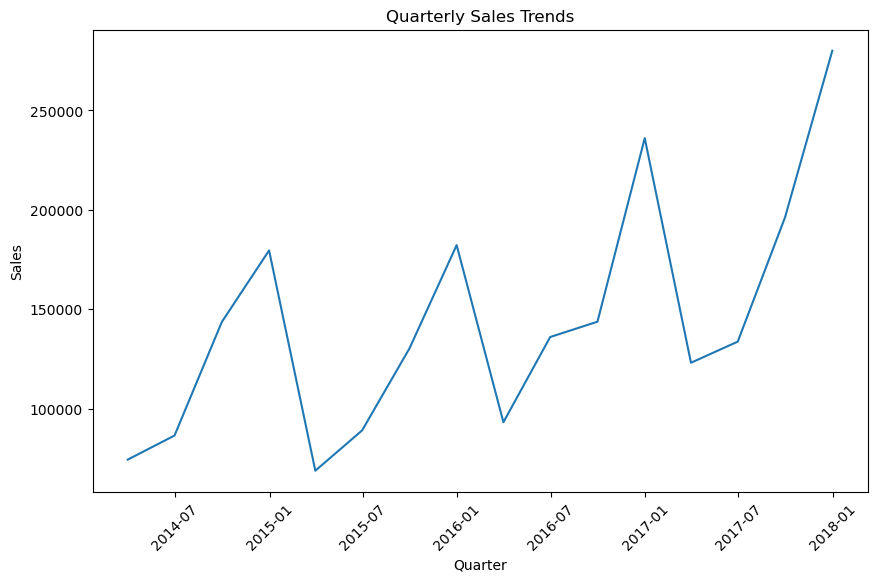

In [22]:
# Identify any seasonal trends or patterns in sales

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the DataFrame index
df.set_index('Order Date', inplace=True)

# Resample the data by quarter and calculate the quarterly sales
quarterly_sales = df['Sales'].resample('Q').sum()

# Plot the quarterly sales trends
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


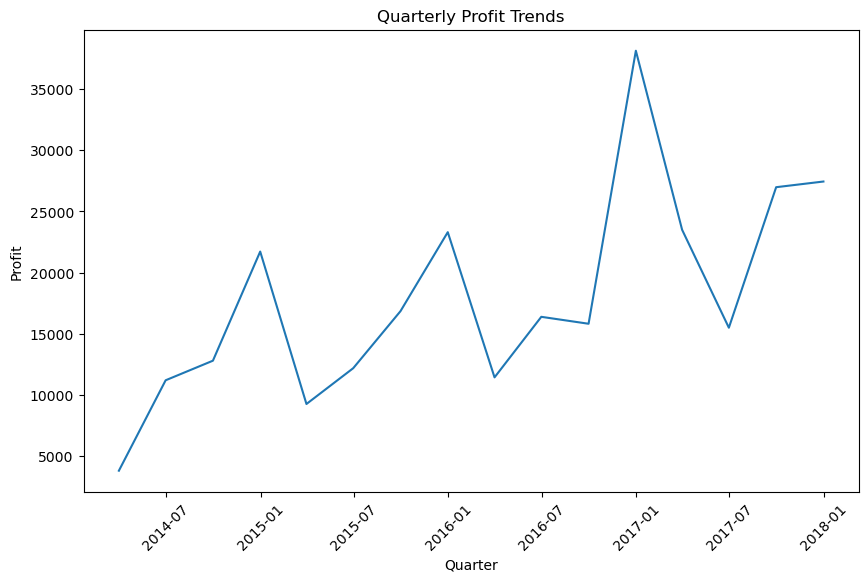

In [25]:
# Identify any seasonal trends or patterns in profit

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the DataFrame index
df.set_index('Order Date', inplace=True)

# Resample the data by quarter and calculate the quarterly sales
quarterly_profit = df['Profit'].resample('Q').sum()

# Plot the quarterly sales trends
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales.index, quarterly_profit.values)
plt.title('Quarterly Profit Trends')
plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


In [26]:
# Identifying the categories with the highest profit margins.

# Calculate profit margin for each category
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Sort Categories by profit margin in descending order
Category_sorted_by_margin = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)

# Display Categories with the highest profit margins
Category = Category_sorted_by_margin.head(10)
print(Category)

Category
Technology         15.613805
Office Supplies    13.803029
Furniture           3.878353
Name: Profit Margin, dtype: float64


In [27]:
# Identifying the product with the highest profit margins.

# Calculate profit margin for each product
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Sort products by profit margin in descending order
Product_sorted_by_margin = df.groupby('Product Name')['Profit Margin'].mean().sort_values(ascending=False)

# Display Products with the highest profit margins
Products = Product_sorted_by_margin.head(10)
print(Products)

Product Name
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier                    50.0
Avery 475                                                                                50.0
Southworth Structures Collection                                                         50.0
Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book    50.0
Tops Green Bar Computer Printout Paper                                                   50.0
Xerox 1890                                                                               50.0
Avery 5                                                                                  49.0
Xerox 1918                                                                               49.0
Color-Coded Legal Exhibit Labels                                                         49.0
Strathmore #10 Envelopes, Ultimate White                                                 49.0
Name: Profit Margin, dtype: float64


In [40]:
# Customer Value Analysis

# Calculate the total revenue for each customer
customer_revenue = df.groupby('Customer Name')['Sales'].sum()

# Calculate the average order value for each customer
customer_avg_order_value = df.groupby('Customer Name')['Sales'].mean()

# Calculate the purchase frequency for each customer
customer_purchase_frequency = df.groupby('Customer Name').size()

# Calculate the customer lifetime value (CLV) using a simple formula
customer_clv = customer_avg_order_value * customer_purchase_frequency

# Sort the customers by CLV in descending order
customer_clv_sorted = customer_clv.sort_values(ascending=False)

# Print the top 10 customers with the highest CLV
top_customers = customer_clv_sorted.head(10)
print(top_customers)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
dtype: float64


 Recommendations

1) Top-Selling Products: Allocate more resources, marketing efforts, and inventory management to the top-selling products. These products have a proven track record of generating high sales volume, indicating strong demand from customers.

2) Most Profitable Caategory: Stay up-to-date with the latest technology trends and consumer preferences. Continuously monitor market dynamics, competitor activities, and emerging technologies. Identify opportunities to stay ahead of the competition by offering cutting-edge products or by capitalizing on niche markets within the technology category.

3) Top-Performing Region: Product Assortment: Analyze the top-selling products and categories in the Western region to identify trends and preferences specific to this market. Optimize the product assortment by stocking more of the popular items and tailoring it to the needs and preferences of customers in the Western region.

4) Segement with the Highest Sales and Profit Contributions:  Focus your marketing and advertising campaigns on the consumer segment to maximize sales and profitability. Allocate resources towards reaching and engaging with consumers through targeted advertising, personalized promotions, and effective communication channels.

5) Top Valuable Customer: Personalized Communication: Maintain regular and personalized communication with these customers. Send them personalized emails, newsletters, or offers to make them feel valued and appreciated. Use their purchase history and preferences to tailor your communication.

6) Seasonal Trends: Capitalize on Seasonal Demand: Since there is consistently high sales and Profit in the last quarter of the year, it is crucial to fully leverage this seasonal demand. Increase inventory levels and ensure sufficient stock of popular products to meet customer needs during this period. Consider offering special promotions or discounts to attract more customers and drive higher sales.